In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('TITANIC.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# Variable identification

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### DEPENDENT VARIABLE: 
                                Survived

### INDEPENDENT VARIABLE:
                      Pclass 
                      Sex           
                      Age         
                      SibSp    
                      Parch         
                      Fare  
                      Embarked
                      
                      
### DATATYPE

Integer:
 1. PassengerId
 2. Survived
 3. Pclass
 4. SibSp
 5. Parch
 
 Float:
 1. Age
 2. Fare
 
 String:
 1. Name
 2. Sex
 3. Ticket
 4. Cabin
 5. Embarked
 

VARIABLE CATEGORY
 Categorical
 1. Survived
 2. Pclass
 3. Sex
 4. Embarked
 
 Continuous:
 1. Age
 2. Fare
 
 Discrete:
 1. SibSp
 2. Parch

# Univariate Analysis

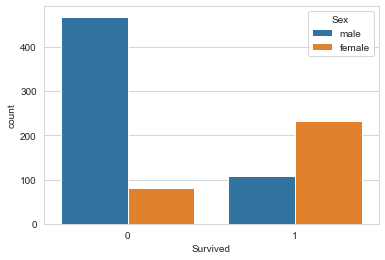

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)


In [7]:
data.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [8]:
print(data[data.Sex == 'female'].Survived.sum()/data[data.Sex == 'female'].Survived.count())
print(data[data.Sex == 'male'].Survived.sum()/data[data.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


#### 74% of women survived, while 19% of men survived

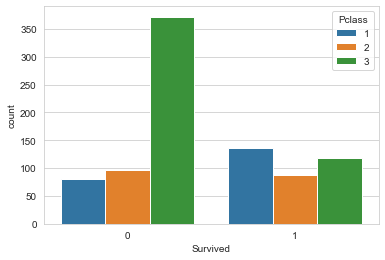

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data)

#### Passengers that travelled in first class were more likely to survive. On the other hand, passengers travelling in third class were more unlikely to survive.

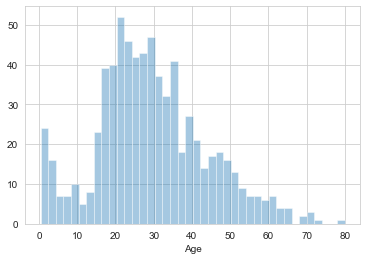

In [10]:
sns.distplot(data['Age'].dropna(),kde=False ,bins=40)

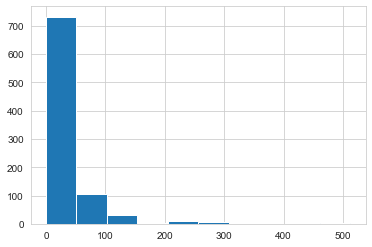

In [11]:
data['Fare'].hist()

#### It looks as though those that paid more had a higher chance of surviving.

In [12]:
data.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


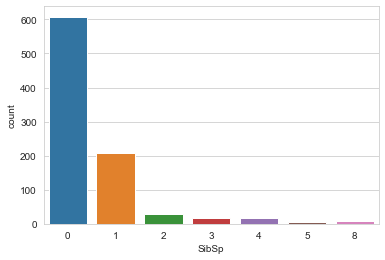

In [13]:
sns.countplot(x='SibSp',data=data)

# Bivariate Analysis

### Pclass  vs Survived

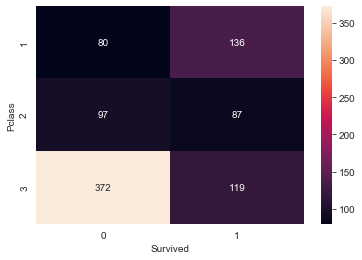

In [14]:
group =data.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack()  
sns.heatmap(pclass_survived, annot = True, fmt ="d") 


#### Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

###  Age (Continuous Feature) vs Survived

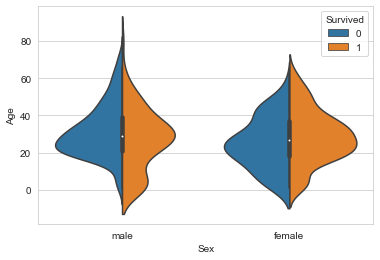

In [15]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = data, split = True) 

### This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –

    Good for children.
    High for women in the age range 20-50.
    Less for men as the age increases.

# Missing value treatment

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Since cabin column has more nulls than actual values, we can delete the column as it is not an important predictor 

In [17]:
data=data.drop(['Cabin'],axis=1)

#### Since there are only 2 nulls in embarked column, we can delete those 2 rows 

In [18]:
data[(data['Embarked']!='S') & (data['Embarked']!='C') & (data['Embarked']!='Q')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [19]:
data = data.drop([61,829],axis=0)

#### replace the age missing values with respected to pclass and fill with a average value of easch class

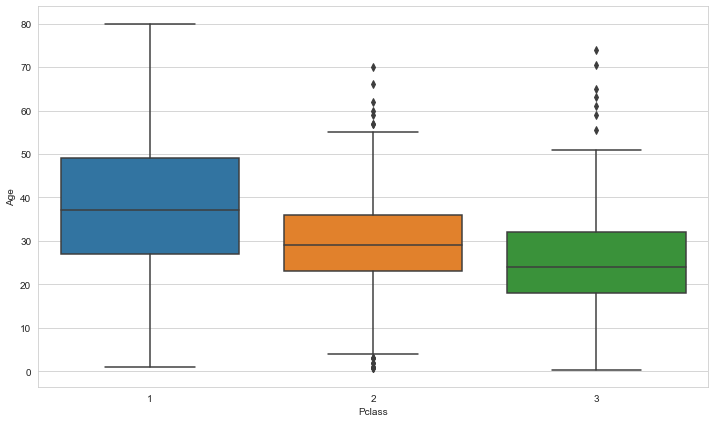

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data)

In [21]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [22]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### delete name and ticket column since there is no effect on prediction as per the assumption

In [24]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Outlier Treatment

#### Outlier treatment of Age

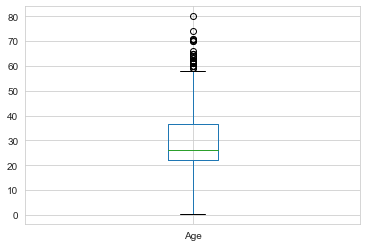

In [26]:
data.boxplot('Age')

#### There are only upper outliers after the missing value treatment

In [27]:
iqr_age=data['Age'].quantile(0.75)-data['Age'].quantile(0.25)
iqr_age

14.5

In [28]:
upper_age=data['Age'].quantile(0.75)+1.5*iqr_age
upper_age


58.25

In [29]:
lower_age=data['Age'].quantile(0.25)-1.5*iqr_age
lower_age


0.25

In [30]:
outlier=data[(data['Age']>=upper_age) | (data['Age']<lower_age)]

In [31]:
outlier

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
33,34,0,2,male,66.0,0,0,10.5000,S
54,55,0,1,male,65.0,0,1,61.9792,C
94,95,0,3,male,59.0,0,0,7.2500,S
96,97,0,1,male,71.0,0,0,34.6542,C
116,117,0,3,male,70.5,0,0,7.7500,Q
170,171,0,1,male,61.0,0,0,33.5000,S
232,233,0,2,male,59.0,0,0,13.5000,S
252,253,0,1,male,62.0,0,0,26.5500,S
275,276,1,1,female,63.0,1,0,77.9583,S
280,281,0,3,male,65.0,0,0,7.7500,Q


In [32]:
for i in outlier ['PassengerId']:
    if data['Age'][i-1]>=upper_age:
        data['Age'][i-1]=data['Age'].quantile(0.95)
    if data['Age'][i-1]<=lower_age:
        data['Age'][i-1]=data['Age'].quantile(0.05)    

C:\Users\nishw\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
check=data[(data['Age']>=upper_age) | (data['Age']<lower_age)]

In [34]:
check

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


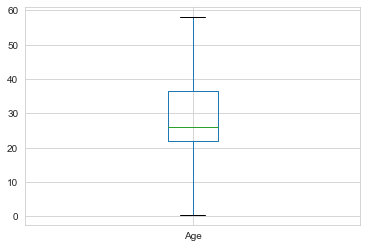

In [35]:
data.boxplot('Age')

#### Outllier Treatment og Fare

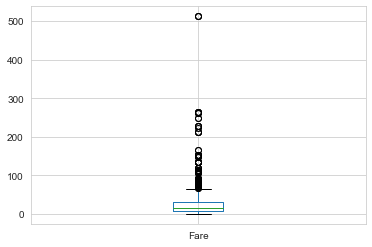

In [36]:
data.boxplot('Fare')

In [37]:
iqr_fare=data['Fare'].quantile(0.75)-data['Fare'].quantile(0.25)
iqr_fare

23.1042

In [38]:
upper_fare=data['Fare'].quantile(0.75)+1.5*iqr_fare
upper_fare

65.6563

In [39]:
lower_fare=data['Fare'].quantile(0.25)-1.5*iqr_fare
lower_fare

-26.7605

In [40]:
outfare=data[(data['Fare']>=upper_fare) | (data['Fare']<lower_fare)]

In [41]:
outfare

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
27,28,0,1,male,19.0,3,2,263.0000,S
31,32,1,1,female,37.0,1,0,146.5208,C
34,35,0,1,male,28.0,1,0,82.1708,C
52,53,1,1,female,49.0,1,0,76.7292,C
...,...,...,...,...,...,...,...,...,...
846,847,0,3,male,24.0,8,2,69.5500,S
849,850,1,1,female,37.0,1,0,89.1042,C
856,857,1,1,female,45.0,1,1,164.8667,S
863,864,0,3,female,24.0,8,2,69.5500,S


In [42]:
outfare.reset_index(inplace=True)   

In [43]:
value=data['Fare'].mean()
value

32.09668087739029

In [44]:
for i in (outfare['index']):
    data['Fare'][i]=value

C:\Users\nishw\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


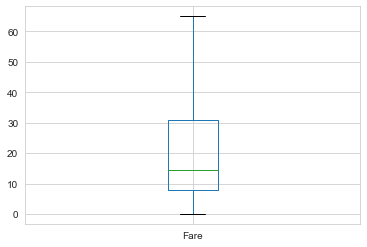

In [45]:
data.boxplot('Fare')

###  The categorical variables here are Pclass, Sex and Embarked. Since Pclass is in term of numbers, it shows as noncategorical variable(False) . Hence it is necessary to modify the Pclass column

In [46]:
for i in data['PassengerId']:
    if int(data['Pclass'][i-1]) == 1:
        data['Pclass'][i-1]= 'first'
    elif int(data['Pclass'][i-1]) == 2 :
        data['Pclass'][i-1]= 'second'
    elif int(data['Pclass'][i-1]) == 3:
        data['Pclass'][i-1]= 'third'

C:\Users\nishw\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\nishw\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\nishw\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel pac

In [47]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,third,male,22.0,1,0,7.250000,S
1,2,1,first,female,38.0,1,0,32.096681,C
2,3,1,third,female,26.0,0,0,7.925000,S
3,4,1,first,female,35.0,1,0,53.100000,S
4,5,0,third,male,35.0,0,0,8.050000,S


# Variable Creation

In [48]:
data=pd.get_dummies(data,drop_first=True)

In [49]:
data.head(100)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_second,Pclass_third,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.250000,0,1,1,0,1
1,2,1,38.0,1,0,32.096681,0,0,0,0,0
2,3,1,26.0,0,0,7.925000,0,1,0,0,1
3,4,1,35.0,1,0,53.100000,0,0,0,0,1
4,5,0,35.0,0,0,8.050000,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
96,97,0,54.0,0,0,34.654200,0,0,1,0,0
97,98,1,23.0,0,1,63.358300,0,0,1,0,0
98,99,1,34.0,0,1,23.000000,1,0,0,0,1
99,100,0,34.0,1,0,26.000000,1,0,1,0,1


In [50]:
cols = ['PassengerId','Age', 'SibSp', 'Parch', 'Fare',
       'Pclass_second', 'Pclass_third', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Survived']
data= data[cols]

In [51]:
data = data.drop('PassengerId',axis = 1)
print(data)

      Age  SibSp  Parch       Fare  Pclass_second  Pclass_third  Sex_male  \
0    22.0      1      0   7.250000              0             1         1   
1    38.0      1      0  32.096681              0             0         0   
2    26.0      0      0   7.925000              0             1         0   
3    35.0      1      0  53.100000              0             0         0   
4    35.0      0      0   8.050000              0             1         1   
..    ...    ...    ...        ...            ...           ...       ...   
886  27.0      0      0  13.000000              1             0         1   
887  19.0      0      0  30.000000              0             0         0   
888  24.0      1      2  23.450000              0             1         0   
889  26.0      0      0  30.000000              0             0         1   
890  32.0      0      0   7.750000              0             1         1   

     Embarked_Q  Embarked_S  Survived  
0             0           1        

# CLASSIFICATION MODEL 1 : LOGISTIC REGRESSION

## Defining x and y

In [52]:
x = data.iloc[:,:-1]
x

,Age,SibSp,Parch,Fare,Pclass_second,Pclass_third,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.250000,0,1,1,0,1
1,38.0,1,0,32.096681,0,0,0,0,0
2,26.0,0,0,7.925000,0,1,0,0,1
3,35.0,1,0,53.100000,0,0,0,0,1
4,35.0,0,0,8.050000,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.000000,1,0,1,0,1
887,19.0,0,0,30.000000,0,0,0,0,1
888,24.0,1,2,23.450000,0,1,0,0,1
889,26.0,0,0,30.000000,0,0,1,0,0


In [53]:
y = data.iloc[:,-1]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [54]:
x.shape

(889, 9)

In [55]:
y.shape

(889,)

## Splitting the dataset

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=0)

## Scaling the test and train data

In [57]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Building the model

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# fit the model to the training data
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred1 = lr.predict(x_test)

In [60]:
y_pred1

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [61]:
y_test

14     0
159    0
763    1
741    0
483    1
      ..
620    0
821    1
65     1
884    0
52     1
Name: Survived, Length: 267, dtype: int64

# Model evaluation using confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred1)
confusion

array([[134,  23],
       [ 36,  74]], dtype=int64)

In [63]:
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]
print ("TN: ", TN)
print ("FP: ", FP)
print ("FN: ", FN)
print ("TP: ", TP)

TN:  134
FP:  23
FN:  36
TP:  74


In [64]:
confusion_matrix = pd.DataFrame(confusion)
confusion_matrix.columns = ['Predicted death', 'Predicted survived']
confusion_matrix = confusion_matrix.rename(index = {0 : 'Actual death', 1 : 'Actual Survived'})
confusion_matrix

,Predicted death,Predicted survived
Actual death,134,23
Actual Survived,36,74


# Confusion matrix evaluation metrics

In [65]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred1)
accuracy

0.7790262172284644

## Classification Error


In [66]:
print ((FP+FN)/float(TP+TN+FP+FN))
print (round(1-metrics.accuracy_score(y_test, y_pred1),4))

0.2209737827715356
0.221


In [67]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
roc_auc = roc_auc_score(y_test, y_pred1)

print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,2)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 78.0
F1 score is : 71.0
Precision is  : 76.0
Recall is  : 67.0
Roc Auc is  : 76.0


## The accuracy obtained by building the model using logistic regression is 78%

# CLASSIFICATION MODEL 2 : KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
y_pred2 = classifier.predict(x_test)
y_pred2

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [70]:
y_test

14     0
159    0
763    1
741    0
483    1
      ..
620    0
821    1
65     1
884    0
52     1
Name: Survived, Length: 267, dtype: int64

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[131  26]
 [ 36  74]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       157
           1       0.74      0.67      0.70       110

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267

0.7677902621722846


In [72]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

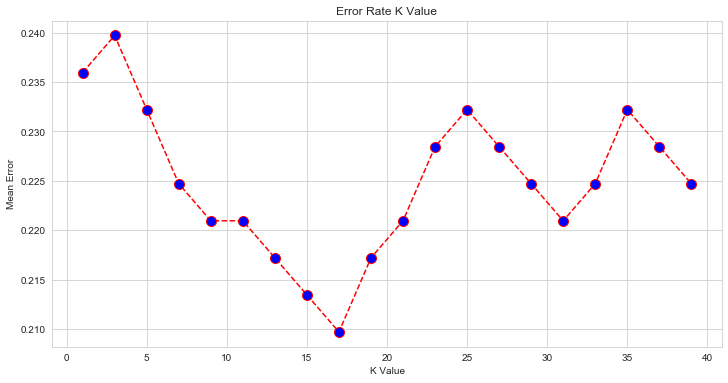

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=17)
classifier2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [75]:
y_pred3 = classifier.predict(x_test)
y_pred3

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

[[131  26]
 [ 36  74]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       157
           1       0.74      0.67      0.70       110

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267

0.7677902621722846


## The accuracy obtained by building the model using KNN is 76.77%

# Clssification Model 3: Decision tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred3=clf.predict(x_test)
y_pred3

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [79]:
from sklearn import metrics

In [80]:
print("Accuracy:",round(metrics.accuracy_score(y_test,y_pred3)*100,2),"%")

Accuracy: 76.4 %


In [81]:
cm=confusion_matrix(y_test,y_pred3)
cm

array([[128,  29],
       [ 34,  76]], dtype=int64)

C:\Users\nishw\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


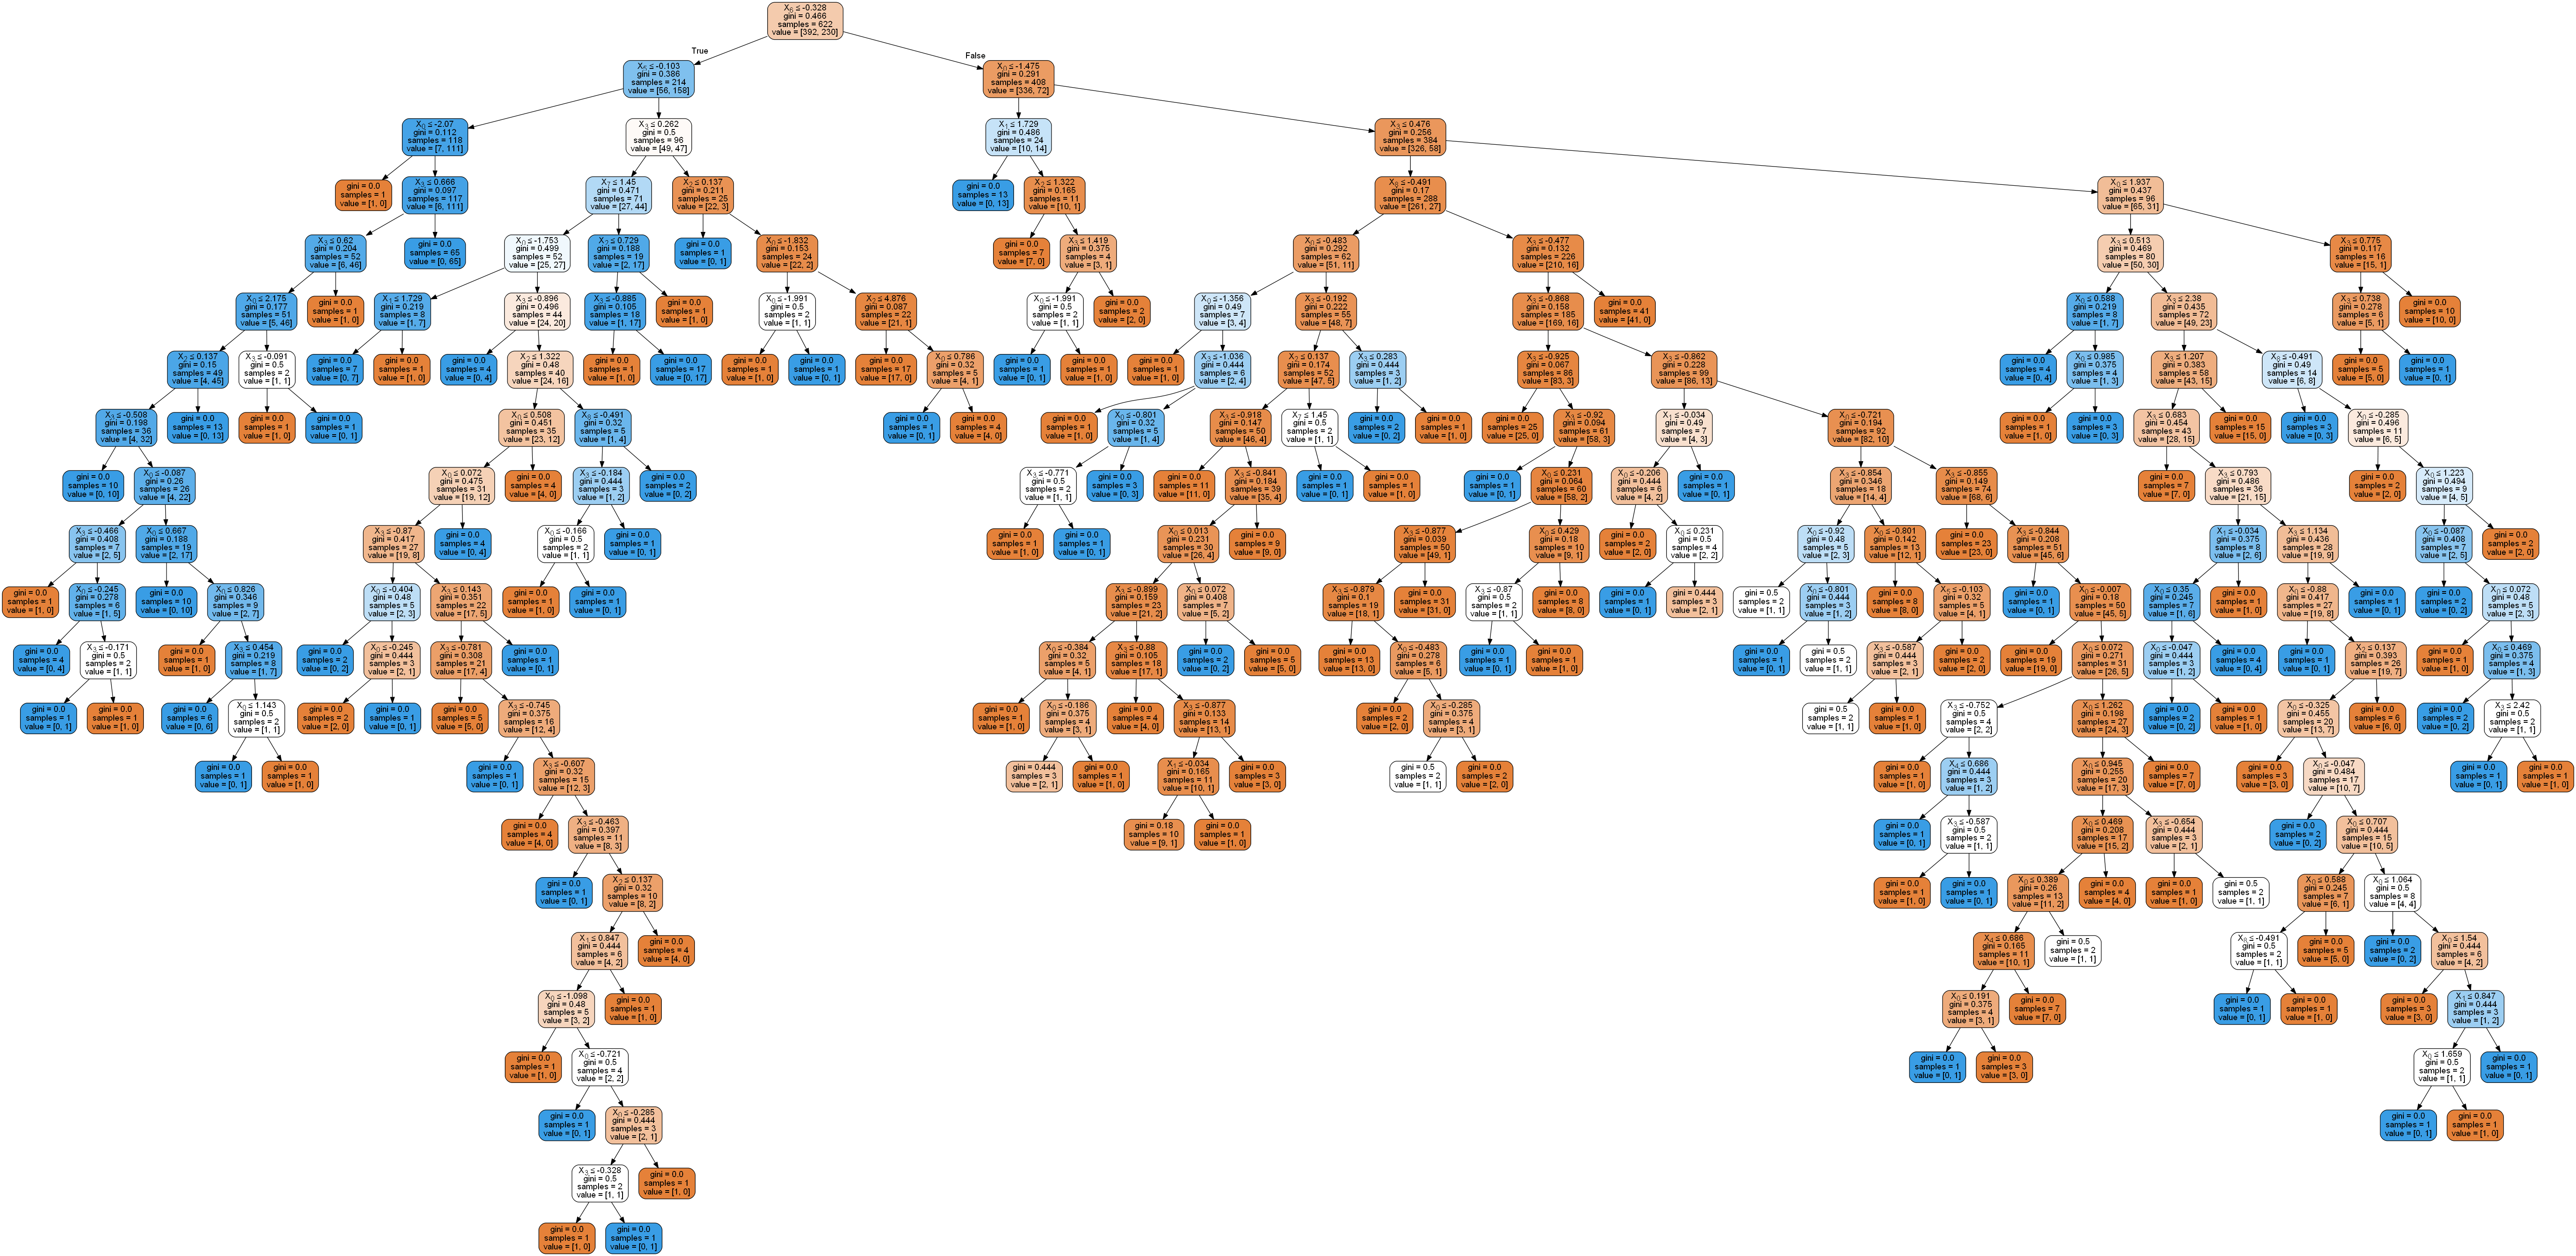

In [82]:

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
 filled=True, rounded=True,
                special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),width=12000,height=12000)

## The accuracy obtained by building the model using decision tree is 76.78%

# Classification Model 4: Random Forest


In [83]:
from sklearn.ensemble import RandomForestClassifier
# Creating a RAndom Forest Classifier
clf2 = RandomForestClassifier(n_estimators = 60, n_jobs= 2, random_state
= 0)
# Training the Classifier
clf2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
y_pred4 = clf2.predict(x_test)
y_pred4

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [85]:
y_test


14     0
159    0
763    1
741    0
483    1
      ..
620    0
821    1
65     1
884    0
52     1
Name: Survived, Length: 267, dtype: int64

In [86]:
y_pred4

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

## Accuracy matrics

In [87]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [88]:
cm2 = confusion_matrix(y_test, y_pred4)

In [89]:
cm2


array([[134,  23],
       [ 34,  76]], dtype=int64)

In [90]:
metrics.accuracy_score(y_test, y_pred4)

0.7865168539325843

In [91]:
pd.crosstab(y_test, y_pred4, rownames = ['Actual Status'], colnames = [
'Predicted Status'])


Predicted Status,0,1
Actual Status,,
0,134,23
1,34,76


## The accuracy obtained by building the model using Random Forest is 78.65%

### After building various Classification Models ,based on the accuracy we can suggest that Random Forest classification model is the best model 